- let's proceed with the examples for LightGBM (LGBMClassifier and LGBMRegressor).
- LightGBM is known for its speed and efficiency, especially on large datasets.

#### B. LightGBM Examples (LGBMClassifier & LGBMRegressor)

**Example 1 (LightGBM Classifier): Breast Cancer Dataset**

In [1]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------- ----------- 1.0/1.5 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import lightgbm as lgb # Import LightGBM
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# --- 1. Load Breast Cancer Dataset ---
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

X_df = pd.DataFrame(X, columns=feature_names)
print("Breast Cancer Dataset Loaded for LightGBM Classifier.")
print(f"Features shape: {X_df.shape}, Target shape: {y.shape}")


Breast Cancer Dataset Loaded for LightGBM Classifier.
Features shape: (569, 30), Target shape: (569,)


In [4]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42, stratify=y
)
# Note: LightGBM can handle numerical data directly. Scaling is not strictly required
# but can sometimes be beneficial for consistency or if other models are being compared.


In [5]:
# --- 3. Instantiate and Train LightGBM Classifier ---
print("\n--- LightGBM Classifier (Breast Cancer Dataset) ---")
# Key LGBMClassifier parameters:
#   n_estimators: Number of boosting rounds (trees).
#   learning_rate: Step size shrinkage.
#   max_depth: Maximum depth of a tree (-1 for no limit).
#   num_leaves: Max number of leaves in one tree (main parameter for tree complexity).
#   subsample (bagging_fraction): Subsample ratio of the training instances.
#   colsample_bytree (feature_fraction): Subsample ratio of columns when constructing each tree.
#   reg_alpha (lambda_l1): L1 regularization.
#   reg_lambda (lambda_l2): L2 regularization.
#   objective: 'binary' for binary classification.
#   metric: Evaluation metric, e.g., 'binary_logloss', 'auc'.

lgbm_clf = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31, # Default, good starting point
    max_depth=-1,   # No limit by default
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_jobs=-1,
    # verbose=-1 # Suppress LightGBM's own verbose output during training
)
# For LightGBM, it's good practice to use eval_set for early stopping in real projects
# lgbm_clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10)
lgbm_clf.fit(X_train, y_train)



--- LightGBM Classifier (Breast Cancer Dataset) ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 250, number of negative: 148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3972
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628141 -> initscore=0.524249
[LightGBM] [Info] Start training from score 0.524249
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

LGBMClassifier(metric='binary_logloss', n_jobs=-1, objective='binary',
               random_state=42)


LightGBM Classifier Test Accuracy: 0.9591

Confusion Matrix (LightGBM Classifier):


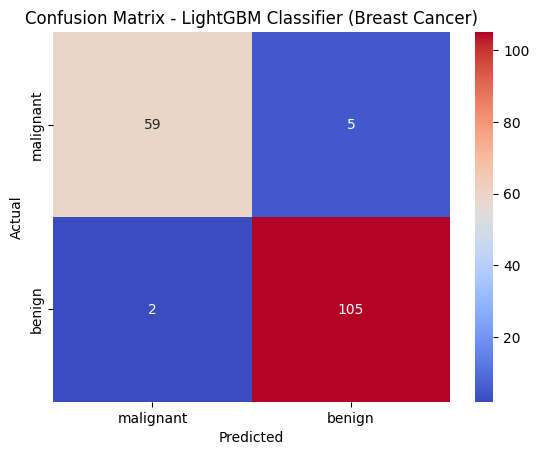


Classification Report (LightGBM Classifier):
              precision    recall  f1-score   support

   malignant       0.97      0.92      0.94        64
      benign       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [6]:
# --- 4. Make Predictions and Evaluate ---
y_pred_lgbm_clf = lgbm_clf.predict(X_test)
y_pred_proba_lgbm_clf = lgbm_clf.predict_proba(X_test)[:, 1] # Probability of class 1
accuracy_lgbm_clf = accuracy_score(y_test, y_pred_lgbm_clf)

print(f"\nLightGBM Classifier Test Accuracy: {accuracy_lgbm_clf:.4f}")

print("\nConfusion Matrix (LightGBM Classifier):")
cm_lgbm_clf = confusion_matrix(y_test, y_pred_lgbm_clf)
sns.heatmap(cm_lgbm_clf, annot=True, fmt="d", cmap="coolwarm", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM Classifier (Breast Cancer)")
plt.show()

print("\nClassification Report (LightGBM Classifier):")
print(classification_report(y_test, y_pred_lgbm_clf, target_names=target_names))



Feature Importances from LightGBM Classifier:
                 feature  importance
27  worst concave points         237
21         worst texture         164
1           mean texture         142
7    mean concave points         132
22       worst perimeter         115


C:\Users\king\AppData\Local\Temp\ipykernel_8488\1520277208.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df_lgbm.head(10), palette="magma") # Top 10


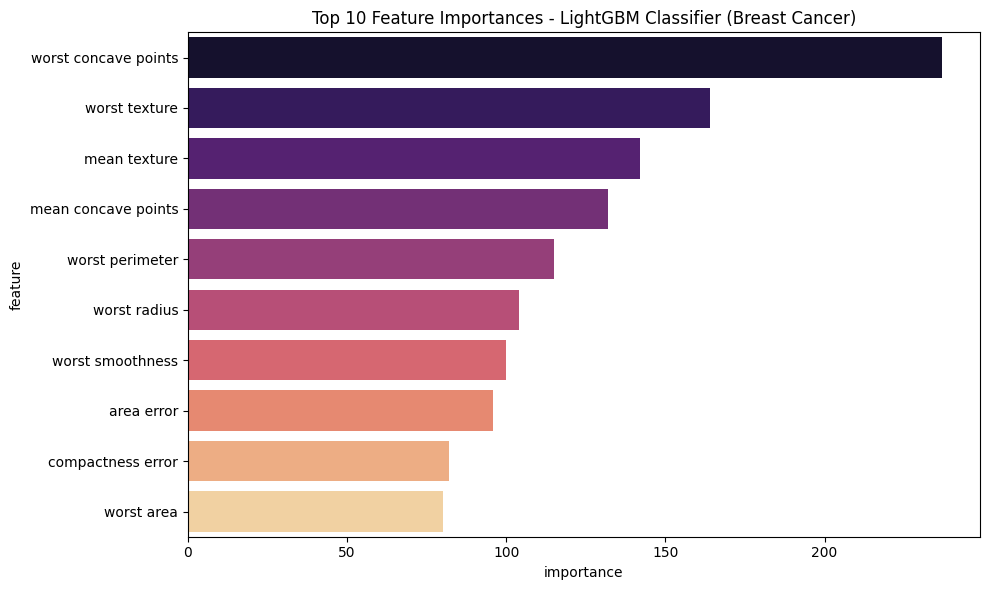

In [7]:
# --- 5. Feature Importances ---
importances_lgbm = lgbm_clf.feature_importances_
feature_importance_df_lgbm = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_lgbm
}).sort_values('importance', ascending=False)

print("\nFeature Importances from LightGBM Classifier:")
print(feature_importance_df_lgbm.head()) # Print top features

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df_lgbm.head(10), palette="magma") # Top 10
plt.title('Top 10 Feature Importances - LightGBM Classifier (Breast Cancer)')
plt.tight_layout()
plt.show()


---
**Example 2 (LightGBM Regressor): California Housing Dataset**

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import lightgbm as lgb # Import LightGBM
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# --- 1. Load California Housing Dataset ---
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

X_df = pd.DataFrame(X, columns=feature_names)
print("California Housing Dataset Loaded for LightGBM Regressor.")


California Housing Dataset Loaded for LightGBM Regressor.


In [10]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42
)

In [11]:
# --- 3. Instantiate and Train LightGBM Regressor ---
print("\n--- LightGBM Regressor (California Housing Dataset) ---")
# Key LGBMRegressor parameters are similar to LGBMClassifier,
# but with objective typically 'regression' or 'regression_l1', and metric 'l2' (MSE) or 'rmse'.
lgbm_reg = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    max_depth=-1,
    objective='regression', # Objective for regression
    metric='rmse',          # Root Mean Squared Error as metric
    random_state=42,
    n_jobs=-1,
    # verbose=-1
)
lgbm_reg.fit(X_train, y_train)



--- LightGBM Regressor (California Housing Dataset) ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 14448, number of used features: 8
[LightGBM] [Info] Start training from score 2.069240


LGBMRegressor(metric='rmse', n_jobs=-1, objective='regression', random_state=42)

In [12]:
# --- 4. Make Predictions and Evaluate ---
y_pred_lgbm_reg = lgbm_reg.predict(X_test)
mse_lgbm_reg = mean_squared_error(y_test, y_pred_lgbm_reg)
r2_lgbm_reg = r2_score(y_test, y_pred_lgbm_reg)

print(f"\nLightGBM Regressor Test MSE: {mse_lgbm_reg:.4f}")
print(f"LightGBM Regressor Test R2 Score: {r2_lgbm_reg:.4f}")



LightGBM Regressor Test MSE: 0.2105
LightGBM Regressor Test R2 Score: 0.8396



Feature Importances from LightGBM Regressor:
     feature  importance
6   Latitude         676
7  Longitude         662
0     MedInc         391
5   AveOccup         385
1   HouseAge         255


C:\Users\king\AppData\Local\Temp\ipykernel_8488\1774368552.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df_lgbm_reg.head(10), palette="plasma")


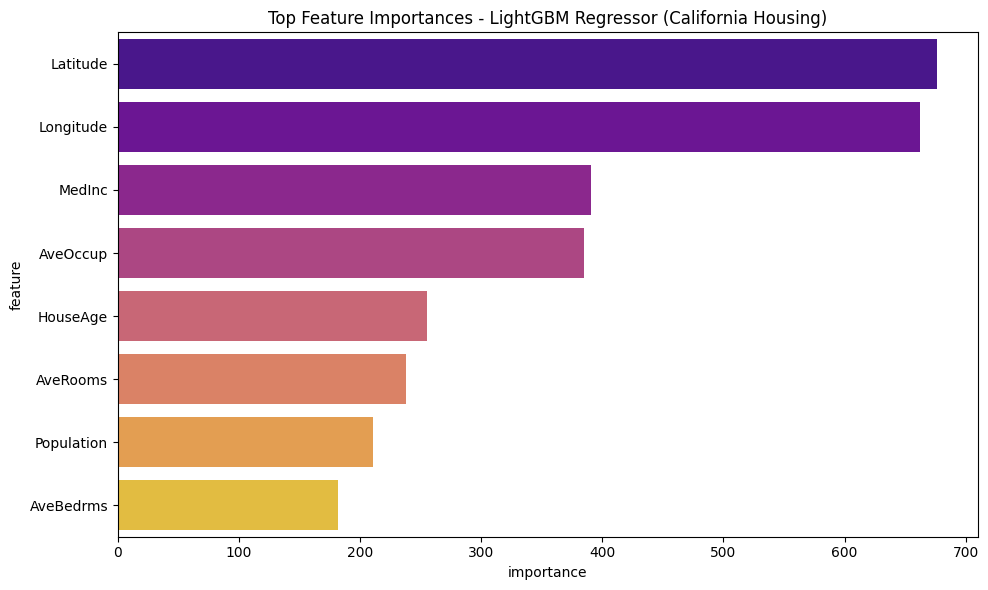

In [13]:
# --- 5. Feature Importances ---
importances_lgbm_reg = lgbm_reg.feature_importances_
feature_importance_df_lgbm_reg = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_lgbm_reg
}).sort_values('importance', ascending=False)

print("\nFeature Importances from LightGBM Regressor:")
print(feature_importance_df_lgbm_reg.head())

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df_lgbm_reg.head(10), palette="plasma")
plt.title('Top Feature Importances - LightGBM Regressor (California Housing)')
plt.tight_layout()
plt.show()

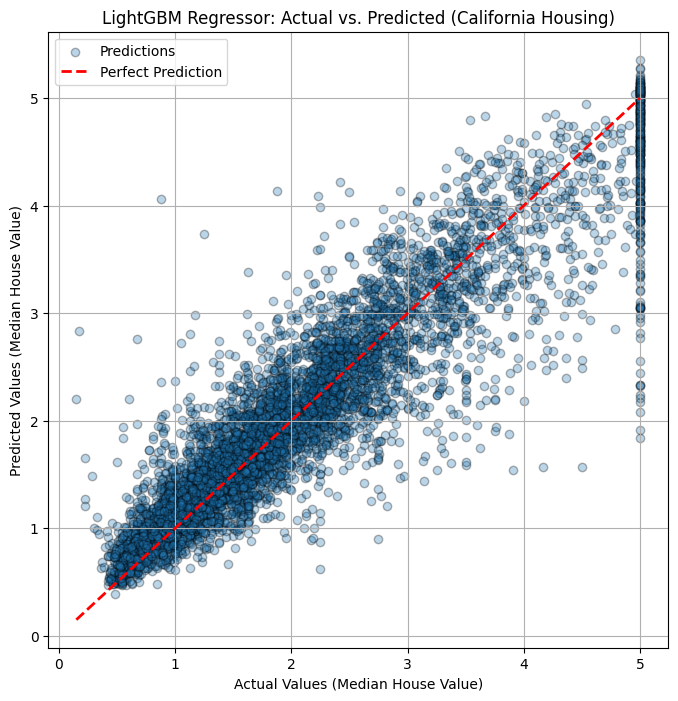

In [14]:
# --- 6. Plot Actual vs. Predicted Values ---
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_lgbm_reg, alpha=0.3, edgecolors='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Values (Median House Value)")
plt.ylabel("Predicted Values (Median House Value)")
plt.title("LightGBM Regressor: Actual vs. Predicted (California Housing)")
plt.legend()
plt.grid(True)
plt.show()
